In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1rAOinJ5vhdKkmxsoO-3G5LaoASaDKUjE' # masukan id drive file nya
output = 'Loan-Data.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1rAOinJ5vhdKkmxsoO-3G5LaoASaDKUjE
To: /content/Loan-Data.csv
100%|██████████| 240M/240M [00:03<00:00, 68.5MB/s]


'Loan-Data.csv'

# **Load Dataset**

## Data Loan

In [3]:
df = pd.read_csv('/content/Loan-Data.csv', index_col=0)
df.head()

<ipython-input-3-79f1a964693d>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Loan-Data.csv', index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


## Data Dictionary Loan

In [6]:
# load data dicitonary for description
url = 'https://docs.google.com/spreadsheets/d/1RVqjiwl-C57Q7V_bOBegrGHNZPb0lXG-magVCkVE-Tw/export?format=xlsx&gid=1767127016' # masukan id drive file nya
output = 'DataDictionary.xlsx'
gdown.download(url, output)

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1RVqjiwl-C57Q7V_bOBegrGHNZPb0lXG-magVCkVE-Tw/export?format=xlsx&gid=1767127016
To: /content/DataDictionary.xlsx
23.7kB [00:00, 35.3MB/s]


'DataDictionary.xlsx'

In [7]:
dict_data = pd.read_excel('/content/DataDictionary.xlsx')
dict_data.rename(columns={'Unnamed: 0':'Features','Unnamed: 2':'Deskripsi'},inplace=True)
dict_data.dropna()

,Features,Description,Deskripsi
0,_rec,The total amount committed by investors for th...,Jumlah total yang dilakukan oleh investor untu...
1,acc_now_delinq,The number of accounts on which the borrower i...,Jumlah akun di mana peminjam sekarang nakal.
2,addr_state,The state provided by the borrower in the loan...,Negara yang disediakan oleh peminjam dalam apl...
3,all_util,Balance to credit limit on all trades,Saldo ke batas kredit untuk semua perdagangan
4,annual_inc,The self-reported annual income provided by th...,v
...,...,...,...
73,total_rec_prncp,Principal received to date,Kepala sekolah diterima hingga saat ini
74,total_rev_hi_lim,Total revolving high credit/credit limit,Total Batas Kredit/Kredit Tinggi Revolving
75,url,URL for the LC page with listing data.,URL untuk halaman LC dengan data daftar.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Menunjukkan jika pendapatan bersama co-peminja...


## Split data for Categorical and Numerical

In [8]:
categorical = df.select_dtypes(include='object').columns.to_list()
numerical = df.select_dtypes(exclude='object').columns.to_list()

In [9]:
# for categorical
df[categorical].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [10]:
# for numerical
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


# **Target Variable**

Dalam melakukan pemodelan risiko kredit, tujuan utamanya adalah memprediksi apakah seseorang mampu membayar pinjaman mereka. Variabel target yang digunakan dalam dataset adalah ***loan_status***, yang memberikan informasi tentang bagaimana seseorang telah melakukan pembayaran kredit mereka.

In [11]:
# Counts digunakan normalisasi agar data menjadi konsisten
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Sekarang kita bisa mengetahui beberapa status seseorang dalam pembayaran kreditnya, yaitu


1. **Current** = Pembayaran berjalan lancar
2. **Fully Paid** = Pembayaran sudah lunas
3. **Charged Off** = Pembayaran macet atau dianggap sebagai kerugian oleh kreditur
4. **Late (31-120 days)** = Keterlambatan pembayaran selama 31 hingga 120 hari
5. **In grace period** = Masa tenggang pembayaran.
6. **Does not meet. Status:Fully paid** = Tidak memenuhi kebijakan kredit, tetapi status akhirnya adalah pembayaran lunas
7. **Late (16-30 days)** = Keterlambatan pembayaran selama 16 hingga 30 hari
8. **Default** = Pembayaran macet
9. **Does not meet. Status:Charged Off** = Tidak memenuhi kebijakan kredit, dan status akhirnya adalah pembayaran macet.

Dikarenakan memiliki Problem Statement risiko kredit, maka kita bisa mengkategorikan seseorang termasuk Bad Loan atau Good Loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 0) dan good loan (sebagai 1).

In [12]:
bad_loan = [
    'Charged Off',
    'Late (31-120 days)',
    'Late (16-30 days)',
    'Default',
    'Does not meet the credit policy. Status:Charged Off'
]

df2= df.copy()

df2['good/bad'] = np.where(df['loan_status'].isin(bad_loan), 0, 1)
df2['good/bad'].value_counts(normalize=True)*100

1    88.808132
0    11.191868
Name: good/bad, dtype: float64

In [13]:
# 1 = Good . 0 = Bad
df2[['loan_status','good/bad']]

,loan_status,good/bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


In [14]:
# Mengembalikan nilai good/bad loan ke data utama
df['loan_status'] = df2['good/bad']

# **Exploratory Data**

# **Informasi Peminjaman**

In [15]:
df_type = df.groupby('loan_status')['id'].count().reset_index()
df_type = df_type.rename(columns = {"id":"count_showids"})
layout = go.Layout(title='Loan Status')
fig = go.Figure(layout=layout)
fig.add_trace(
    go.Pie(
        labels=['0 (Bad Loan)','1 (Good Loan)'],
        values=df_type['count_showids'],
        marker_colors= ["#0c2054","#f3ac3d"],
        textinfo='label+percent+value',
        pull=[0,0.1]
        ))
fig.update_layout(
    title='Loan Status',
    title_font_family="Arial Black",
    title_font_color="#0c2054",
    title_font_size=32,
    title_x=0.5,
    width=800,
    legend=dict(
        x=0,
        y=1,
        title_font_family="Times New Roman",
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightBlue",
        bordercolor="Black",
        borderwidth=1
    ),
    legend_title_text='Legend')

plotly.offline.iplot(fig)

# **Alasan Peminjaman**

In [16]:
df[['Month','Year']] = df['issue_d'].str.split('-',expand=True)
df['Year'] = df['Year'].replace(['07','08','09','10','11','12','13','14'],['2007','2008','2009','2010','2011','2012','2013','2014'])


In [17]:
df_purpose = df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index()
df2 = df.purpose.value_counts().sort_values()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'scatter'}]],
                    subplot_titles=('Distribution Loan Purpose', 'Undescribe Purpose (Other)'))

fig.add_trace(go.Bar(x=df2, y=df2.index, text=df2,
                     marker_color="#0c2054", name='Category', orientation='h'),
              row=1, col=1)

fig.update_traces(texttemplate='%{text:} People')

fig.update_layout(title='Loan Purpose',
                  xaxis_tickfont_size=14, xaxis_tickfont_color="#333333",
                  yaxis=dict(title='Category', titlefont_size=16, tickfont_size=14),
                  legend=dict(title='Line Graph', font=dict(size=12)))

fig.add_trace(go.Scatter(name='Other', mode='lines', x=df_purpose[df_purpose['purpose'] == 'other']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'other']['loan_amnt'],
                         line=dict(color='#FFA000', width=2)), row=1, col=2)

fig.update_traces(
    hovertemplate='Year: %{x}Total Loan: %{y:,.0f}'
)

fig.update_xaxes(title='Year', row=1, col=2)
fig.update_yaxes(title='Total Loan', row=1, col=2)

fig.update_layout(height=500, width=1000, title_font_family="Arial Black", title_font_color="#0c2054", title_font_size=32, title_x=0.5)



# **Jumlah Total Pinjaman by Top 5th Purpose and Year.**

In [18]:
df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index().sort_values(by='loan_amnt', ascending=False).head(20)

,purpose,Year,loan_amnt
23,debt_consolidation,2014,2203835875
22,debt_consolidation,2013,1251110425
15,credit_card,2014,853482525
14,credit_card,2013,482561225
21,debt_consolidation,2012,445182300
35,home_improvement,2014,189687575
20,debt_consolidation,2011,144057250
13,credit_card,2012,135468775
75,other,2014,105173150
34,home_improvement,2013,104862250


In [19]:
df_purpose = df.groupby(['purpose','Year'])['loan_amnt'].sum().reset_index()

fig = go.Figure()

fig.update_layout(title='Total Loan Amount by 5th Top Purpose and Year')

fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Total Loan Amount')

fig.add_trace(go.Scatter(name='Other',mode='lines+markers',x=df_purpose[df_purpose['purpose'] == 'other']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'other']['loan_amnt'],
                          line=dict(color='#01939e', width=2)))
fig.add_trace(go.Scatter(name='Credit Card',mode='lines+markers',x=df_purpose[df_purpose['purpose'] == 'credit_card']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'credit_card']['loan_amnt'],
                          line=dict(color='#2b019e', width=2)))
fig.add_trace(go.Scatter(name='Debt Consolidation',mode='lines+markers',x=df_purpose[df_purpose['purpose'] == 'debt_consolidation']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'debt_consolidation']['loan_amnt'],
                          line=dict(color='#0c2054', width=2)))
fig.add_trace(go.Scatter(name='Home Improvement',mode='lines+markers',x=df_purpose[df_purpose['purpose'] == 'home_improvement']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'home_improvement']['loan_amnt'],
                          line=dict(color='#9e6a01', width=2)))
fig.add_trace(go.Scatter(name='Major Purchase',mode='lines+markers',x=df_purpose[df_purpose['purpose'] == 'major_purchase']['Year'],
                         y=df_purpose[df_purpose['purpose'] == 'major_purchase']['loan_amnt'],
                          line=dict(color='#FF6600', width=2)))

fig.update_traces(marker=dict(size=8), hovertemplate="%{y:,.0f}%{x}")

fig.update_traces(marker=dict(size=8))

fig.update_layout(font=dict(size=12), plot_bgcolor='white', legend=dict(title='Purpose', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1), height=500, width=800)

fig.show()


# **Negara yang Paling Aktif Memanfaatkan Layanan Pinjaman**

In [20]:
df3 = df.addr_state.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Borrower\'s Country of Origin',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show()


# **Status Kepemilikan Rumah yang Menggunakan Layanan injaman**

In [21]:
df.home_ownership = df.home_ownership.replace(['ANY'],'OTHER')
df.home_ownership.value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          183
NONE            50
Name: home_ownership, dtype: int64

In [22]:
df3 = df.home_ownership.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='The Status of Home Ownership',title_font_color="#0c2054",title_font_size=32,width=700,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} Orang', textposition='outside')
fig.show(renderer='colab')

# **Pekerjaan Peminjam yang Menggunakan Layanan Pinjaman**

In [23]:
df3 = df.emp_title.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Employment Title Borrower\'s',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

# **Total Jumlah Pinjaman dalam Tahunan**

In [24]:
df_amnt = df.groupby(['Year'])['loan_amnt'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(name='Peminjaman',mode='lines',x=df_amnt.Year, y=df_amnt.loan_amnt,
                          line=dict(color='#0c2054', width=2)))
fig.update_layout(
    title='Total Loan Amount',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

# **Distribusi Grade Pinjaman Peminjam**

In [25]:
df3 = df.grade.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Loan Grade',title_font_color="#0c2054",title_font_size=32,width=700,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')

# **Kategori Penghasilan Peminjam**

In [26]:
df.annual_inc = np.select([df.annual_inc <75000, df.annual_inc <150000, df.annual_inc >75000],
                          ['Low','Medium','High'])
df.annual_inc = df.annual_inc.replace(['0'],'Low')
df.annual_inc.value_counts()

Low       291983
Medium    149817
High       24485
Name: annual_inc, dtype: int64

In [27]:
df3 = df.annual_inc.value_counts()
df3 = df3.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=df3.index,y=df3,text=df3
              ,marker_color="#0c2054", name='Content'))
fig.update_layout(
    title='Customer Income Category',title_font_color="#0c2054",title_font_size=32,
    xaxis_tickfont_size=14,xaxis_tickfont_color='#0c2054',
    yaxis=dict(
        title='Content',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.update_traces(texttemplate='%{text:} People', textposition='outside')
fig.show(renderer='colab')


# **Cleaning & Data Imputation**

## Clean Data

In [28]:
# For Categorical Data
print('shape before drop = ',df.shape)

df_clean = df.drop(columns=['member_id','id','emp_title','url','desc','title','zip_code','policy_code','application_type'], axis=1)
df_clean.drop_duplicates(inplace=True)

print('shape after drop = ',df_clean.shape)

shape before drop =  (466285, 76)
shape after drop =  (466285, 67)


> Drop data yang tidak diperlukan di modeling dan memiliki duplikat

In [29]:
# For Numerical Data
print('shape before drop = ',df_clean.shape)

df_clean = df_clean.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','inq_last_12m','total_cu_tl'], axis=1)

print('shape after drop = ',df_clean.shape)

shape before drop =  (466285, 67)
shape after drop =  (466285, 50)


> Drop data yang memiliki nilai NaN pada setiap barisnya

# Preprocessing

In [30]:
df_pre = df_clean.copy()
df_pre.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Month,Year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,Dec,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN,Dec,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN,Dec,2011
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,Dec,2011


In [31]:
# Drop kata months di kolom term
df_pre['term'] = df_pre['term'].str.replace(' months', '')
df_pre['term'] = df_pre['term'].astype(float)

In [32]:
# Drop data_years di kolom emp_length
df_pre['emp_length'] = df_pre['emp_length'].str.replace('\+ years', '')
df_pre['emp_length'] = df_pre['emp_length'].str.replace('< ', '')
df_pre['emp_length'] = df_pre['emp_length'].str.replace('< 1 year', str(0))
df_pre['emp_length'] = df_pre['emp_length'].str.replace(' years', '')
df_pre['emp_length'] = df_pre['emp_length'].str.replace(' year', '')
df_pre['emp_length'] = df_pre['emp_length'].astype(float)

<ipython-input-32-6b891c765b6a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



# **Correlations**

In [ ]:
pip install dython

# Korelasi setiap Variabel Numeric

In [33]:
corr_matrix = df_pre.corr()

<ipython-input-33-a7b8c5854d5f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [34]:
# Memberikan batas-batas nilai
vmin, vmax = 0.1, 0.99

unstack_corr = corr_matrix.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [35]:
# Buat mask untuk mempersingkat korelasi
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

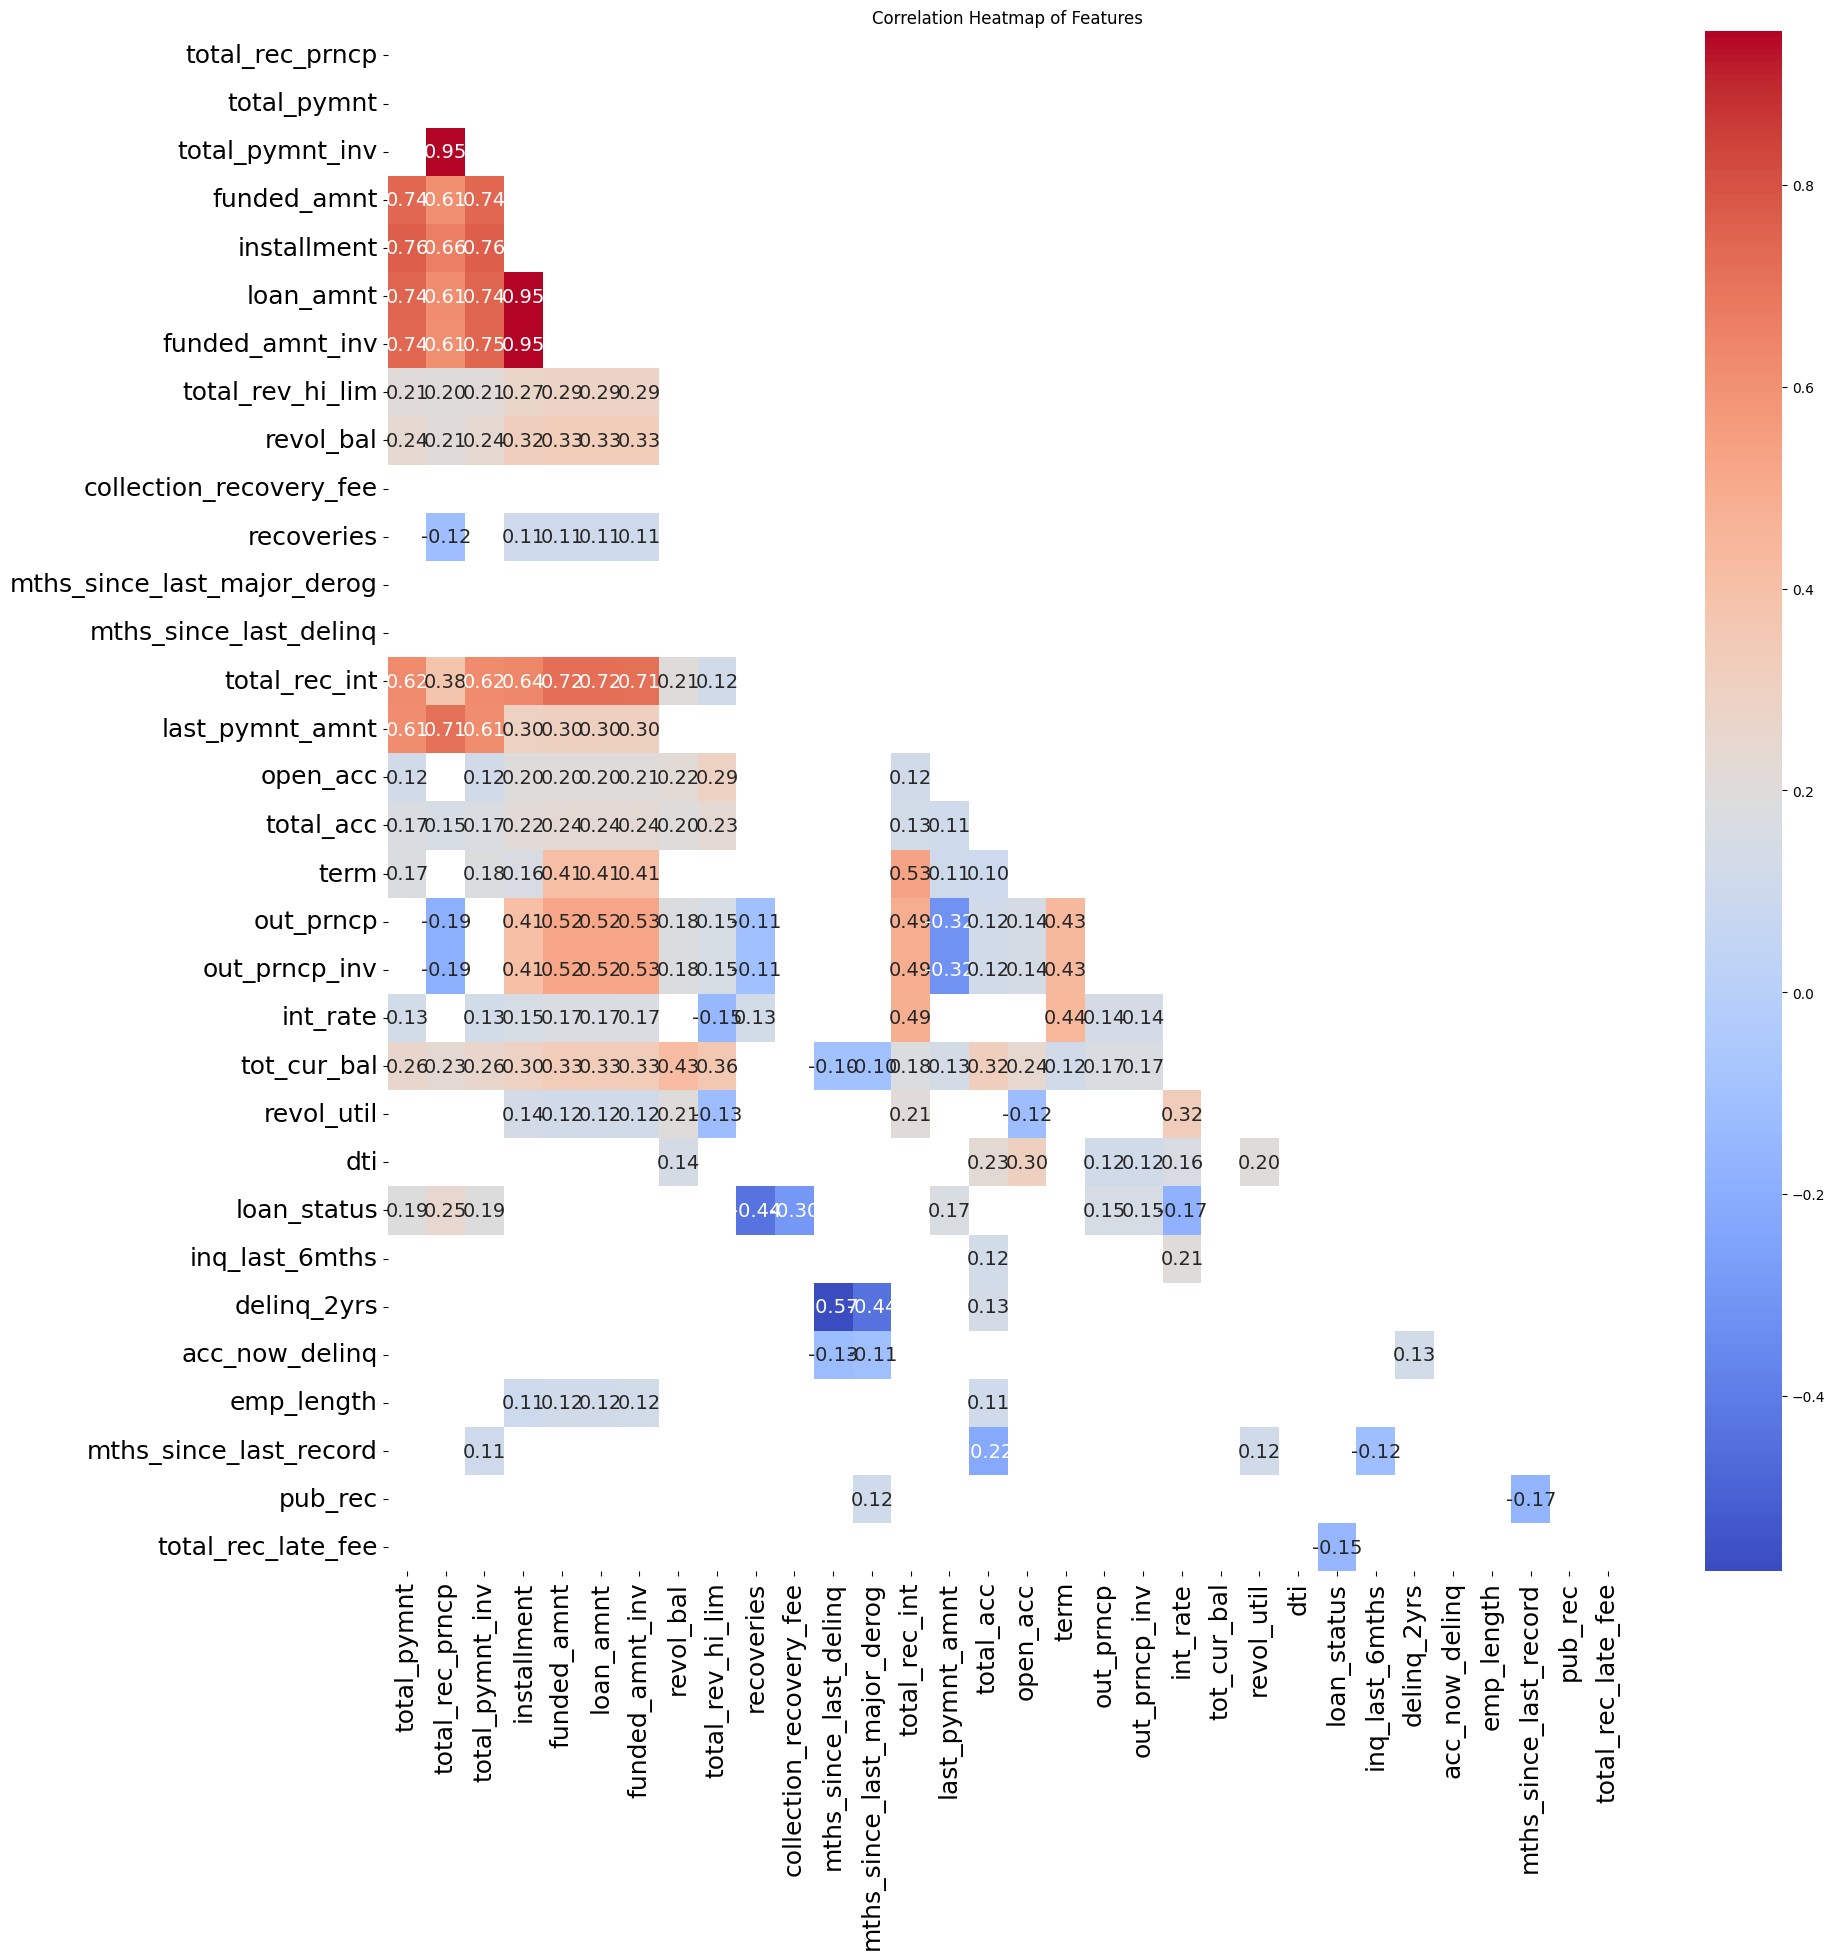

In [36]:
# Buat heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr,
    annot=True,
    mask=mask,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.title("Correlation Heatmap of Features")
plt.show()

In [37]:
# Nilai nilai yang berkorelasi dengan loan_status
correlations = (df_pre.select_dtypes(exclude=object).corr().dropna(how="all", axis=0).dropna(how="all", axis=1))

correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
recoveries                     0.435352
collection_recovery_fee        0.295281
total_rec_prncp                0.254255
total_pymnt_inv                0.194638
total_pymnt                    0.193977
int_rate                       0.174648
last_pymnt_amnt                0.170164
total_rec_late_fee             0.151624
out_prncp                      0.150442
out_prncp_inv                  0.150430
inq_last_6mths                 0.073109
term                           0.064644
revol_util                     0.051020
tot_cur_bal                    0.050865
dti                            0.049092
total_rev_hi_lim               0.037735
total_rec_int                  0.022833
mths_since_last_record         0.022542
total_acc                      0.022366
revol_bal                      0.018536
emp_length                     0.016499
installment                    0.015347
loan_amnt                      0.013181
funded_amnt                    0.012401


Kita akan menggunakan numerical yang memiliki korelasi di atas > 0,1 dengan loan_status sebagai feature numeric. Namun ada beberapa kolom yang berkolasi diatas > 0,1 memiliki isi data yang ambigu

In [38]:
# Kolom numeric yang akan kita gunakan
affect_num_cols = ['recoveries','collection_recovery_fee','total_rec_prncp','int_rate', 'last_pymnt_amnt',
                   'total_rec_late_fee','out_prncp','out_prncp_inv']
affect_num_cols

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'int_rate',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp',
 'out_prncp_inv']

# Korelasi Variabel Categorical

In [40]:
cat_features = df_pre.select_dtypes(include=object).columns
cat_features

Index(['grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'Month', 'Year'],
      dtype='object')

# Kolom kategori berisi date



In [41]:
from dython.nominal import associations

In [42]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
date_cols

['issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d']

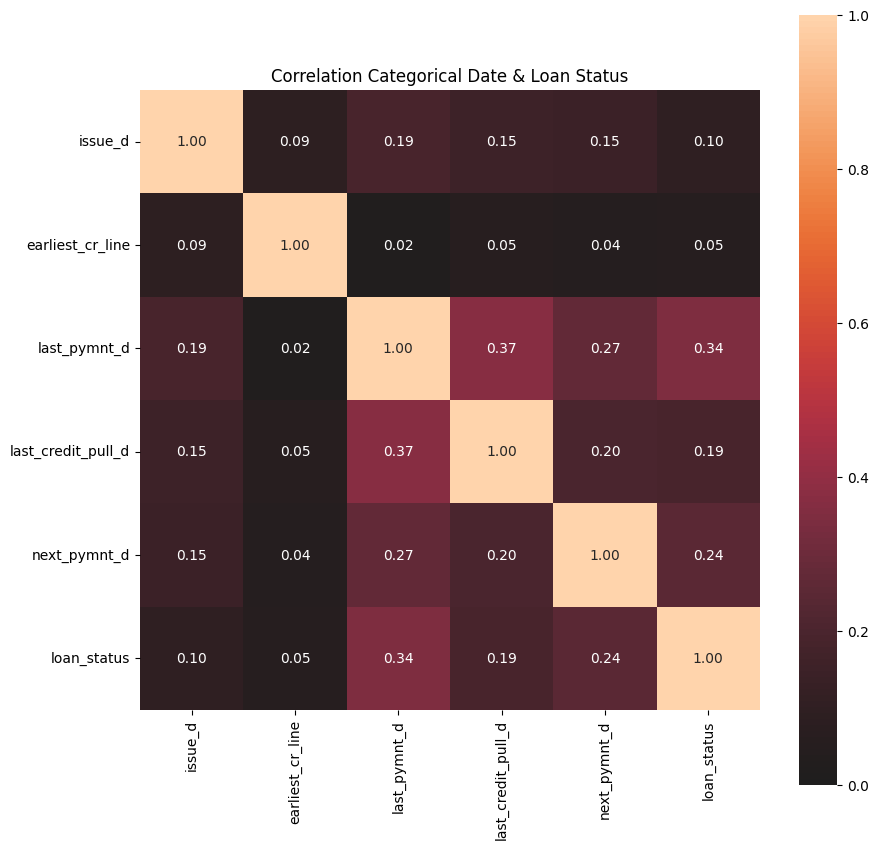

In [45]:
# Korelasi antar date dan loan_status
used_cols = date_cols + ["loan_status"]
complete_correlation = associations(
    df_pre[used_cols],
    title='Correlation Categorical Date & Loan Status',
    figsize=(10,10)
)

Kita akan menggunakan kategori date yang memiliki korelasi di atas > 0,1 dengan loan_status sebagai feature kategori (date)

In [48]:
# Fitur date yang digunakan
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

# Kolom kategori

In [ ]:
# kategori yang selain date dan unused kolom
other_cat_cols = cat_features[~cat_features.isin(date_cols + unused_cols)]
other_cat_cols

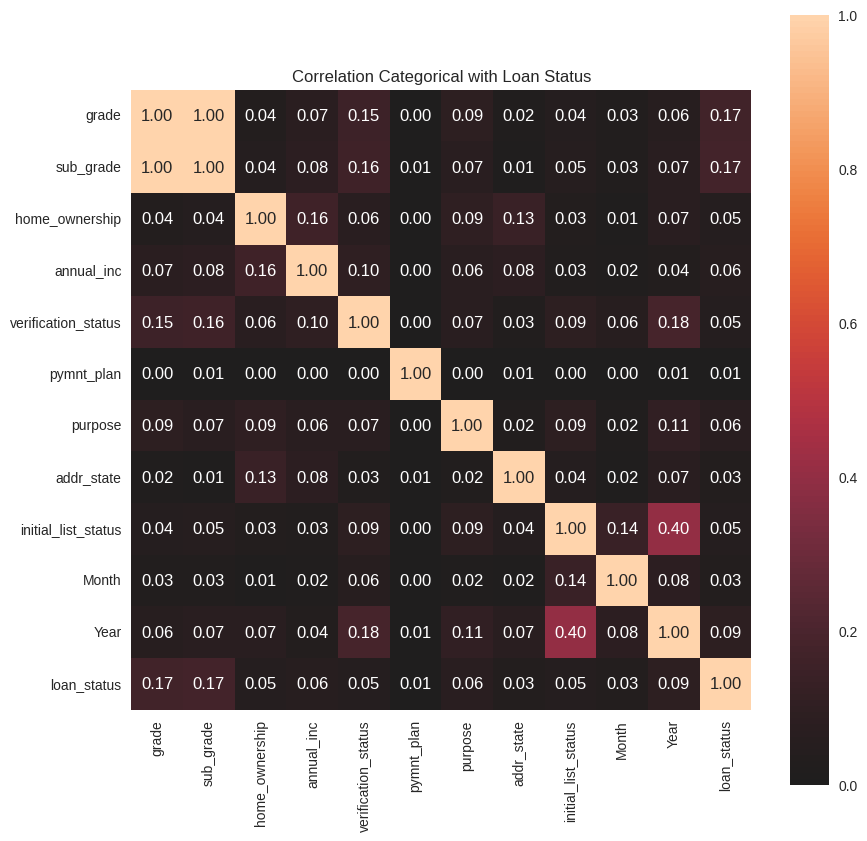

In [67]:
# Hapus fitur tanggal yang tidak digunakan
unused_cols = ["earliest_cr_line"]

# Korelasi antar fitur kategorikal lainnya dan status pinjaman
used_cols = other_cat_cols.to_list() + ["loan_status"]
complete_correlation = associations(
    df_pre[used_cols],
    title='Correlation Categorical with Loan Status',
    filename='cat_correlation.png',
    figsize=(10,10)
)

Kita akan menggunakan kategori  yang memiliki korelasi di atas > 0,1 dengan loan_status sebagai feature kategori


In [51]:
# Fitur kategorikal yang akan kita gunakan
affect_cat_cols = ["grade"]

# **Feature Selection**

In [52]:
# Kolom-kolom features
predictor_cols = affect_num_cols + affect_cat_cols + affect_date_cols
predictor_cols

['recoveries',
 'collection_recovery_fee',
 'total_rec_prncp',
 'int_rate',
 'last_pymnt_amnt',
 'total_rec_late_fee',
 'out_prncp',
 'out_prncp_inv',
 'grade',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d']

# **Data Imputation**

In [53]:
df_pre[predictor_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.487286
last_pymnt_d               0.000806
last_credit_pull_d         0.000090
recoveries                 0.000000
collection_recovery_fee    0.000000
total_rec_prncp            0.000000
int_rate                   0.000000
last_pymnt_amnt            0.000000
total_rec_late_fee         0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
grade                      0.000000
issue_d                    0.000000
dtype: float64

In [54]:
# Isi data dengan "no"
df_pre["next_pymnt_d"] = df_pre["next_pymnt_d"].fillna("no")
df_pre["last_pymnt_d"] = df_pre["last_pymnt_d"].fillna("no")
df_pre["last_credit_pull_d"] = df_pre["last_credit_pull_d"].fillna("no")

In [55]:
df_pre[predictor_cols].isna().mean().sort_values(ascending=False)

recoveries                 0.0
collection_recovery_fee    0.0
total_rec_prncp            0.0
int_rate                   0.0
last_pymnt_amnt            0.0
total_rec_late_fee         0.0
out_prncp                  0.0
out_prncp_inv              0.0
grade                      0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
next_pymnt_d               0.0
dtype: float64

# **Modeliing**

In [ ]:
pip install pycaret

In [ ]:
pip uninstall scipy && pip install scipy

# **Menentukan Label Target dan Feature**

In [58]:
label = df_pre["loan_status"].copy()
features = df_pre[predictor_cols].copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

Label shape:
(466285,)
Features shape:
(466285, 13)


In [59]:
num_features = features.select_dtypes(exclude="object")
cat_features = features.select_dtypes(include="object")

In [60]:
df_model = pd.concat([num_features, cat_features,label], axis=1)
df_model

,recoveries,collection_recovery_fee,total_rec_prncp,int_rate,last_pymnt_amnt,total_rec_late_fee,out_prncp,out_prncp_inv,grade,issue_d,last_pymnt_d,last_credit_pull_d,next_pymnt_d,loan_status
0,0.00,0.00,5000.00,10.65,171.62,0.00,0.00,0.00,B,Dec-11,Jan-15,Jan-16,no,1
1,117.08,1.11,456.46,15.27,119.66,0.00,0.00,0.00,C,Dec-11,Apr-13,Sep-13,no,0
2,0.00,0.00,2400.00,15.96,649.91,0.00,0.00,0.00,C,Dec-11,Jun-14,Jan-16,no,1
3,0.00,0.00,10000.00,13.49,357.48,16.97,0.00,0.00,C,Dec-11,Jan-15,Jan-15,no,1
4,0.00,0.00,2233.10,12.69,67.79,0.00,766.90,766.90,B,Dec-11,Jan-16,Jan-16,Feb-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.00,0.00,5826.00,14.47,432.64,0.00,12574.00,12574.00,C,Jan-14,Jan-16,Jan-16,Feb-16,1
466281,0.00,0.00,1837.04,19.97,17.50,0.00,0.00,0.00,D,Jan-14,Dec-14,Jan-16,no,0
466282,0.00,0.00,6271.69,16.99,514.34,0.00,14428.31,14428.31,D,Jan-14,Jan-16,Dec-15,Feb-16,1
466283,0.00,0.00,2000.00,7.90,1500.68,0.00,0.00,0.00,A,Jan-14,Dec-14,Apr-15,no,1


In [61]:
# menggunakan PyCaret untuk AutoML
from pycaret.classification import *

In [62]:
clf1 = setup(data = df_model,
             target = 'loan_status',
             session_id=111,
             train_size=0.75,
            #  ignore_features='Pregnancies',
             normalize='true'
             )

,Description,Value
0,Session id,111
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(466285, 14)"
4,Transformed data shape,"(466285, 20)"
5,Transformed train set shape,"(349713, 20)"
6,Transformed test set shape,"(116572, 20)"
7,Numeric features,8
8,Categorical features,5
9,Preprocess,True


In [63]:
# Menggunakan beberapa model yang ingin digunakan agar mempercepat pembelajaran
include = ['lr','rf','nb']

In [68]:
compare_models(include)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9879,0.9894,0.9973,0.9892,0.9932,0.9376,0.9382,89.3820
lr,Logistic Regression,0.9677,0.9757,0.9894,0.9746,0.9820,0.8286,0.8307,7.7710
nb,Naive Bayes,0.9372,0.9354,0.9931,0.9396,0.9656,0.6062,0.6391,3.6330


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=111, verbose=0, warm_start=False)

In [69]:
rf_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9874,0.9895,0.9969,0.9889,0.9929,0.9346,0.9352
1,0.9888,0.9895,0.9976,0.9899,0.9937,0.9422,0.9428
2,0.9881,0.9890,0.9972,0.9895,0.9933,0.9385,0.9391
3,0.9872,0.9904,0.9971,0.9885,0.9928,0.9334,0.9341
4,0.9878,0.9891,0.9973,0.9890,0.9931,0.9366,0.9373
5,0.9884,0.9891,0.9977,0.9894,0.9935,0.9400,0.9407
6,0.9876,0.9889,0.9970,0.9891,0.9930,0.9356,0.9363
7,0.9882,0.9908,0.9976,0.9891,0.9934,0.9386,0.9394
8,0.9882,0.9888,0.9973,0.9895,0.9934,0.9391,0.9397


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
evaluate_model(rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…